In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [5]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [6]:
df['fuel_efficiency_mpg'].nunique()

9704

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

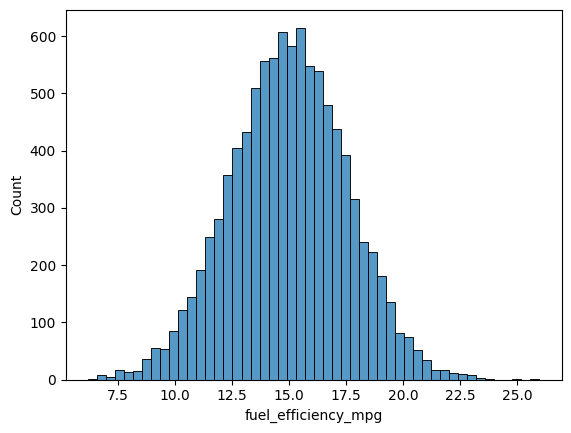

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

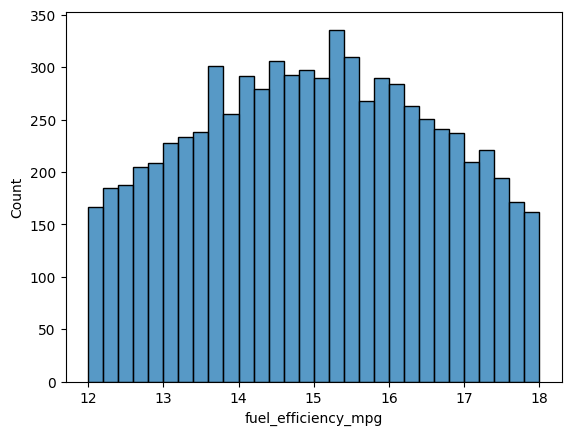

In [8]:
sns.histplot(df.fuel_efficiency_mpg[(df.fuel_efficiency_mpg > 12) & (df.fuel_efficiency_mpg< 18)], bins = 30)

## Question 1

In [9]:
#columns having value greater than 0 means it has null values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2

In [10]:
#median value of horse power
df['horsepower'].median()

np.float64(149.0)

## Question 3

In [11]:
n = len(df)
print(n)

9704


In [12]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)

1940 1940 5824


In [13]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [17]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [18]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [21]:
#getting the mean using the training dataset
mean = df_train['horsepower'].mean()
mean

np.float64(149.54476367006487)

In [22]:
X_train = df_train.fillna(mean)

In [23]:
#training filling na with mean
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train,y_pred)
score

np.float64(0.46)

In [24]:
#validating filling na with mean
X_val = df_val.fillna(mean)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
print(f'rmse score with mean: {round(score, 2)}')

rmse score with mean: 0.46


In [25]:
#training filling na with zero's
X_train = df_train.fillna(0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train,y_pred)
score

np.float64(0.52)

In [26]:
#validating filling na with zero's
X_val = df_val.fillna(0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
print(f'rmse score with zero: {round(score, 2)}')

rmse score with zero: 0.52


## Question 4

In [27]:
#training and validating with regularization

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
def prepare_X(df):
    df_num = df.copy()
    X = df_num.fillna(0).values
    return X

In [31]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 28.82736547365895 0.52
0.01 24.92683841981215 0.52
1 1.7315979411219746 0.52
10 0.18306246621686947 0.52
100 0.01841801730688404 0.52


## Question 5

In [43]:
#logic to split the data for different seeds

def split_data(df, seed_value):
    
    n = len(df)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    print(f' len of each dataset type:  {n_val}, {n_test}, {n_train}')

    idx = np.arange(n)
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    print(f' length of splitted dataframe type : {len(df_train)}, {len(df_val)}, {len(df_test)}')

    return df_train, df_val, df_test
    



In [64]:
def get_actual_values(df_train, df_val, df_test):
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    return y_train, y_val, y_test
    
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X
    
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)
    

In [65]:
scores_lst = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test = split_data(df, seed)
    y_train, y_val, y_test = get_actual_values(df_train, df_val, df_test)
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    #rounded_score = round(score, 2)
    scores_lst.append(score)

 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940


In [66]:
std = np.std(scores_lst)
rounded_std = round(std, 3)
print(rounded_std)


0.007


In [67]:
print(scores_lst)

[np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.51), np.float64(0.53), np.float64(0.53), np.float64(0.51), np.float64(0.51), np.float64(0.51)]


## Question 6

In [68]:
df_train, df_val, df_test = split_data(df, 9)

y_train, y_val, y_test = get_actual_values(df_train, df_val, df_test)
y_full_train = np.concatenate([y_train, y_val])

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
print(w0, w)

 len of each dataset type:  1940, 1940, 5824
 length of splitted dataframe type : 5824, 1940, 1940
26.946834792836274 [ 1.45147512e-05  3.56475200e-03 -5.01712541e-03  1.29155334e-03]


In [63]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

0.52
